In [1]:
import numpy as np
import matplotlib.pyplot as plt

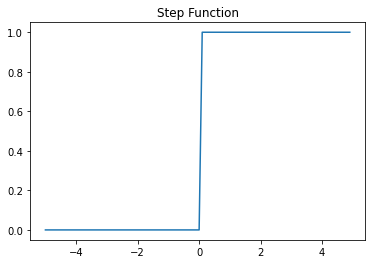

In [4]:
# 계단 함수(Step function)
def step(x):
    return np.array(x > 0, dtype=int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

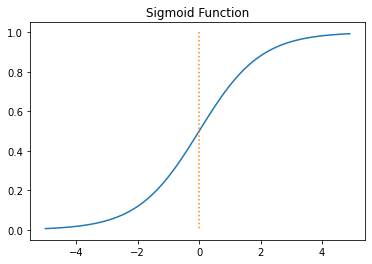

In [6]:
# 시그모이드 함수와 기울기 소실
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

# 시그모이드 함수의 출력값이 0 또는 1에 가까워지면 기울기가 완만해짐
# 끝 부분 두개의 기울기는 0에 가까운데, 아주 작은 기울기가 곱해지게 되면
# 앞단에는 기울기가 잘 전달되지 않음 -> '기울기 소실'

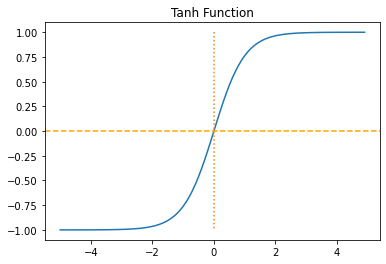

In [7]:
# 하이퍼볼릭탄젠트 함수 (Hyperbolic tangent function)
# 입력값을 -1과 1사이의 값으로 변환하는 함수

x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

# 시그모이드 함수와 같은 문제가 발생하지만, 0을 중심으로 하고 있기 때문에
# 변화폭이 더 큼 -> 기울기 소실 증상이 적은 편

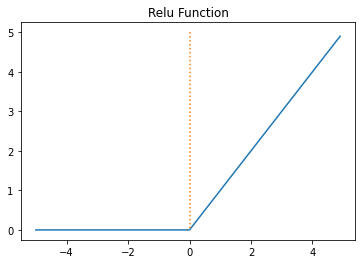

In [9]:
# 렐루 함수 (ReLU)
# f(x) = max(0,x)

def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0,0], [5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

# 음수를 입력하면 음수를 출력, 양수를 입력하면 그대로 반환
# -> 특정 양수값에 수렴하지 않음
# 하지만 입력값이 음수면 기울기도 0이 됨, 다시 회생하는 것이 어려움 -> dying ReLU

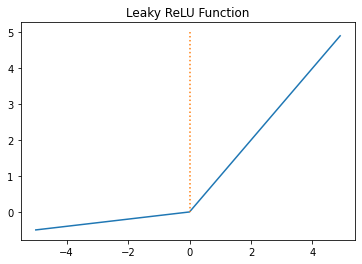

In [10]:
# 리키 렐루 (Leaky ReLU)
# dying ReLu를 보완함
# 입력값이 음수일 경우 0이 아니라, 0.001과 같은 매운 작은 수를 반환
# f(x) = max(ax,x) a - 하이퍼마라미터, 일반적으로 0.01값을 가짐

a = 0.1
def lekay_relu(x):
    return np.maximum(a*x, x)
x = np.arange(-5.0, 5.0, 0.1)
y = lekay_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Leaky ReLU Function')
plt.show()

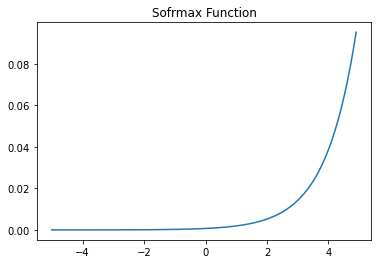

In [11]:
# 소프트맥스 함수
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Sofrmax Function')
plt.show()

# 시그모이드 함수처럼 출력층의 뉴런에서 사용, 다중 클래스 분류에 주로 사용

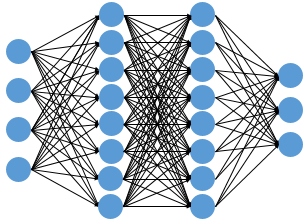
<p> 해당 인공 신경망을 케라스로 구현하는 예시</p>

In [14]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim =4, kernel_initializer='random_uniform', activation ='relu'))
# 입력층(4)과 다음 은닉층(8) 그리고 은닉층의 활성화 함수는 relu
model.add(Dense(8, activation='relu')) # 은닉층(8)의 활성화 함수는 relu
model.add(Dense(3, activation='softmax')) # 출력층(3)의 활성화 함수는 sofrmax